In [ ]:


import pandas as pd
df= pd.read_csv("healthcare_stroke_1.csv")

print("@ Key attributes or variables @")
print(df.columns)
print(df.head(),"\n")

print("@ Structure of the dataset @")
print(df.info(),"\nNumber of Row and Columns",df.shape,"\n","df.describe()")

print("@ Missing values and Duplicates @")
print(df.isnull().sum())
print("\nDuplicate : ",df.duplicated().sum())

@ Key attributes or variables @
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.

In [ ]:
df['age'] = df['age'].fillna(df['age'].median())
df.dropna(subset=['avg_glucose_level'], inplace=True)
df['ever_married'] = df['ever_married'].fillna('Unknown')
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['smoking_status'] = df['smoking_status'].fillna(df['smoking_status'].mode()[0])

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]
print(df)

df=df.drop_duplicates()


print(df.isnull().sum())
print("\nDuplicate : ",df.duplicated().sum())
print(df.shape)


new_df = df.copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ['age', 'bmi', 'avg_glucose_level']
new_df[cols_to_scale] = scaler.fit_transform(new_df[cols_to_scale])
print(new_df)

new2_df = df.copy()
new2_df = pd.get_dummies(new2_df, columns=['smoking_status'])
smoking_cols = [col for col in new2_df.columns if col.startswith('smoking_status_')]
new2_df[smoking_cols] = new2_df[smoking_cols].astype(int)
print(new2_df)


new3_df = df.copy()
new3_df['glucose_binned'] = pd.cut(df['avg_glucose_level'],
                                   bins=3, labels=['Low', 'Medium', 'High'])
print(new3_df[['avg_glucose_level', 'glucose_binned']].head(10))

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0      Unknown   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-

In [ ]:
stroke_work_type = df.groupby("work_type")["stroke"].mean()
print('stroke_work_type\n ', stroke_work_type)
print("\n highest stroke risk:", stroke_work_type.idxmax())

stroke_residence = df.groupby('Residence_type')['stroke'].mean()
print("\nAverage stroke_type:\n", stroke_residence)
print("\n higher stroke risk:", stroke_residence.idxmax())

worktype_hypertension = df.groupby('work_type')['hypertension'].sum()
print("\nHypertension_work_type:\n", worktype_hypertension)
print("\nWork type most pertension cases:", worktype_hypertension.idxmax())




high_glucose= df[df["avg_glucose_level"] > 200]
print('\nhigh_glucose: ', high_glucose.shape[0])

hypertension_heart_disease = df[(df['hypertension'] == 1)
 & (df['heart_disease'] == 1)]
print('\nhypertension and heart_disease:',len(hypertension_heart_disease))


smokers_with_heart_disease = df[((df['smoking_status'] == 'smokes')
 | (df['smoking_status'] == 'formerly smoked')) &(df['heart_disease'] == 1)]
print('\nsmokers_with_heart_disease: ',len(smokers_with_heart_disease))


grsag=df.groupby(['gender', 'Residence_type']).agg({'stroke': 'mean','avg_glucose_level': 'mean'})
print(grsag)

stroke_work_type
  work_type
Govt_job         0.051724
Never_worked     0.000000
Private          0.051934
Self-employed    0.080846
children         0.002950
Name: stroke, dtype: float64

 highest stroke risk: Self-employed

Average stroke_type:
 Residence_type
Rural    0.046191
Urban    0.053087
Name: stroke, dtype: float64

 higher stroke risk: Urban

Hypertension_work_type:
 work_type
Govt_job          72
Never_worked       0
Private          277
Self-employed    143
children           0
Name: hypertension, dtype: int64

Work type most pertension cases: Private

high_glucose:  427

hypertension and heart_disease: 62

smokers_with_heart_disease:  137
                         stroke  avg_glucose_level
gender Residence_type                             
Female Rural           0.044383         104.120791
       Urban           0.051539         104.309786
Male   Rural           0.048780         109.550907
       Urban           0.055291         108.522259
Other  Rural           0.000000 

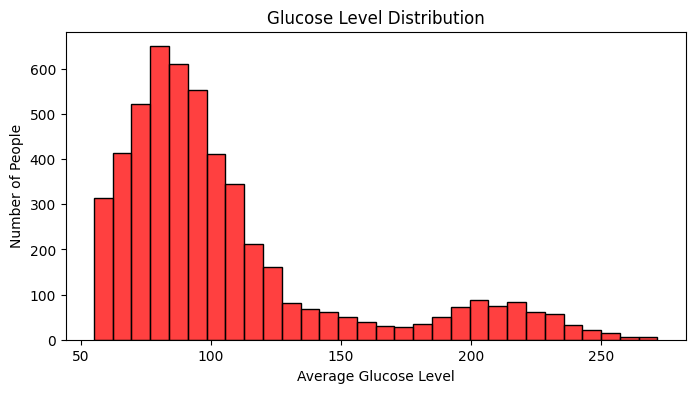

####################################################################################################


<ipython-input-8-d671ded8c6c0>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='bmi', data=df, palette="pastel")


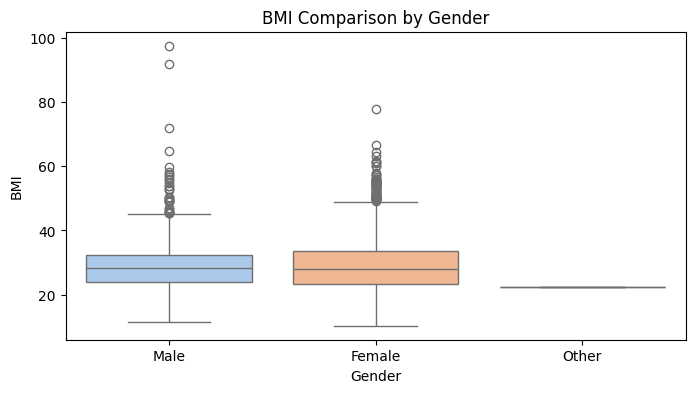

####################################################################################################


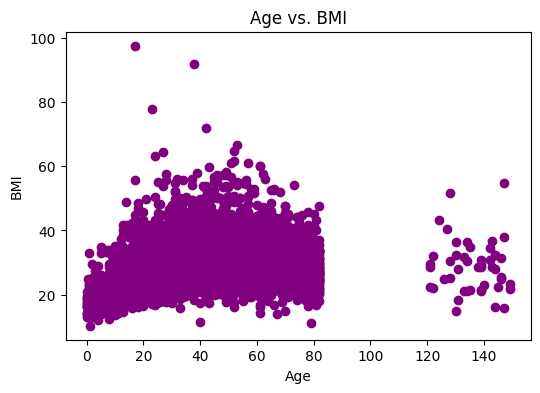

####################################################################################################


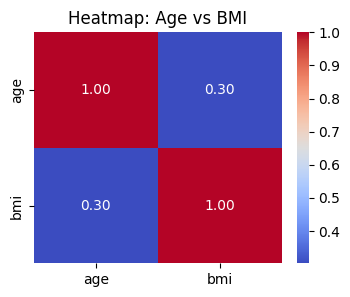

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Glucose Level Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['avg_glucose_level'], bins=30,  color='red')
plt.title("Glucose Level Distribution")
plt.xlabel("Average Glucose Level")
plt.ylabel("Number of People")
plt.show()
print('#'*100)
# Box Plot of BMI by Gender
plt.figure(figsize=(8, 4))
sns.boxplot(x='gender', y='bmi', data=df, palette="pastel")
plt.title("BMI Comparison by Gender")
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.show()

print('#'*100)
# Scatter Plot
plt.figure(figsize=(6, 4))
plt.scatter(df['age'], df['bmi'], color='purple')
plt.title('Age vs. BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()
print('#'*100)
# Heatmap
corr = df[['age', 'bmi']].corr()
plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap: Age vs BMI")
plt.show()